In [1]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

In [2]:
from data_processor import DataProcessor
file_path = "../data/raw/data_factory_1.xlsx"
dp = DataProcessor(file_path)
dp.change_pivot('timestamp','param_name','value')
dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])
dp.rename_column_to_timestamp('timestamp')

In [3]:
from data_processor import CycleProcessor
cp = CycleProcessor(column_name='FeedFlow', df = dp.df, threshold=10)

In [4]:
cp.identify_cycles()
cp.assign_cycle_features()

param_name,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,Permeate Pressure,PermeateConductivity,PermeateFlow,Recovery,cycle_id,cycle_time
0,2022-11-01 00:00:00,119.058464,254.427083,59.811424,238.884183,387.863646,273.325000,83.620000,33.441771,2.684261,269.623333,69.427135,-1,-1
1,2022-11-01 01:00:00,119.284861,254.408333,59.793070,239.050850,388.577708,273.159583,83.740000,33.405078,2.690898,270.177500,69.401548,-1,-1
2,2022-11-01 02:00:00,118.848508,254.044583,59.789896,239.117517,386.958541,272.952917,83.768333,33.316614,2.695333,269.188750,69.404638,-1,-1
3,2022-11-01 03:00:00,118.631324,253.052917,59.742965,239.234183,388.434167,271.841667,84.445000,33.036159,2.644088,270.778750,69.566374,-1,-1
4,2022-11-01 04:00:00,118.826094,254.352500,59.799096,239.217517,387.695000,273.296667,84.073333,33.177526,2.674923,269.938333,69.423221,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558,2024-10-31 19:00:00,125.494205,256.768333,58.073313,294.468367,425.652395,274.579583,82.377917,33.324270,20.424674,300.128125,70.494039,-1,-1
16559,2024-10-31 20:00:00,125.228209,255.743750,57.892086,294.501700,424.630415,273.390417,82.037500,33.009817,20.466732,299.301458,70.492748,-1,-1
16560,2024-10-31 21:00:00,125.290890,256.068333,57.863168,294.535033,424.934480,273.846667,81.451667,33.089192,20.438021,299.532500,70.492430,-1,-1
16561,2024-10-31 22:00:00,125.739584,256.557083,57.940895,294.701700,426.029222,274.174167,81.792500,33.801588,20.491976,300.106458,70.415544,-1,-1


In [5]:
# file_path = '../data/cycle_processing_data/factory1.csv'
# cp.export_files(file_path) 

In [6]:
# from utils.plot.plot_by_cycle import interactive_cycle_plot,plot_by_cycle
# interactive_cycle_plot(cp.df, plot_by_cycle)

In [7]:
# from utils.plot.plot_by_time_period import PlotByTimePeriod

# pbt = PlotByTimePeriod(cp.df)
# month = ['2022-11', '2022-12','2023-01']
# pbt.plot_by_month(month,'FeedFlow')

In [8]:
# from utils.IQR import iqr
# features = dp.list_columns()
# features = [f for f in features if f not in ['timestamp']]
# iqr(dp.df, features)

In [9]:
from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)

In [10]:
fe.generate_cross_features(drop_features=['Recovery', 'PermeateFlow', 'PermeateConductivity', 'Permeate Pressure'])
fe.lag_engineer()

In [11]:
from model.coarse_feature_selection.cfs import random_forest_regressor

In [12]:
dp.df = fe.df
features =dp.df.columns.tolist()

In [13]:
fs = [f for f in features if f != ''and 'timestamp' not in f and 'ConcentratePressure' not in f  and 'PermeatePressure' not in f and 'PermeateConductivity' not in f and f not in ['PermeateFlow'] ]
# #and'Permeate' not in f Permeate Pressure
# print(fs)

训练 RandomForest...
训练 simple RandomForest...


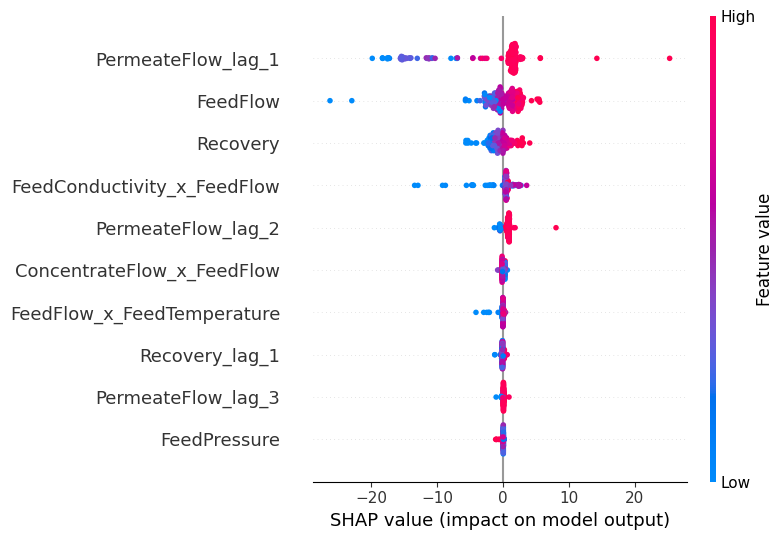

In [14]:
top_k_features = random_forest_regressor(dp, 'PermeateFlow', fs, plant_name='plant1')

In [15]:
import pandas as pd
import numpy as np

In [16]:
top_k_features = pd.read_csv("../data/temp_data/top_k_features_plant1.csv")
top_k_features

,Unnamed: 0,0
0,0,PermeateFlow_lag_1
1,1,FeedFlow
2,2,Recovery
3,3,FeedConductivity_x_FeedFlow
4,4,PermeateFlow_lag_2
5,5,ConcentrateFlow_x_FeedFlow
6,6,FeedFlow_x_FeedTemperature
7,7,Recovery_lag_1
8,8,PermeateFlow_lag_3
9,9,FeedPressure


In [17]:
top_k_features = top_k_features.iloc[:,1].tolist()
top_k_features

['PermeateFlow_lag_1',
 'FeedFlow',
 'Recovery',
 'FeedConductivity_x_FeedFlow',
 'PermeateFlow_lag_2',
 'ConcentrateFlow_x_FeedFlow',
 'FeedFlow_x_FeedTemperature',
 'Recovery_lag_1',
 'PermeateFlow_lag_3',
 'FeedPressure']

In [18]:
target = ['PermeateFlow']

Epoch 1/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 254.19it/s]


Epoch [1/30]  Train Loss: 0.5089  Test Loss: 0.1274


Epoch 2/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 264.84it/s]


Epoch [2/30]  Train Loss: 0.2098  Test Loss: 0.0927


Epoch 3/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 239.88it/s]


Epoch [3/30]  Train Loss: 0.1619  Test Loss: 0.0793


Epoch 4/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 271.89it/s]


Epoch [4/30]  Train Loss: 0.1190  Test Loss: 0.0585


Epoch 5/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 241.75it/s]


Epoch [5/30]  Train Loss: 0.0929  Test Loss: 0.0411


Epoch 6/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 271.25it/s]


Epoch [6/30]  Train Loss: 0.0637  Test Loss: 0.0263


Epoch 7/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 257.70it/s]


Epoch [7/30]  Train Loss: 0.0488  Test Loss: 0.0193


Epoch 8/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 254.01it/s]


Epoch [8/30]  Train Loss: 0.0379  Test Loss: 0.0171


Epoch 9/30: 100%|███████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 266.47it/s]


Epoch [9/30]  Train Loss: 0.0332  Test Loss: 0.0136


Epoch 10/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 262.22it/s]


Epoch [10/30]  Train Loss: 0.0290  Test Loss: 0.0117


Epoch 11/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 262.94it/s]


Epoch [11/30]  Train Loss: 0.0296  Test Loss: 0.0134
🛑 No improvement for 1 epoch(s)


Epoch 12/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 265.14it/s]


Epoch [12/30]  Train Loss: 0.0252  Test Loss: 0.0105


Epoch 13/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 270.69it/s]


Epoch [13/30]  Train Loss: 0.0240  Test Loss: 0.0119
🛑 No improvement for 1 epoch(s)


Epoch 14/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 255.34it/s]


Epoch [14/30]  Train Loss: 0.0234  Test Loss: 0.0103


Epoch 15/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 263.47it/s]


Epoch [15/30]  Train Loss: 0.0219  Test Loss: 0.0111
🛑 No improvement for 1 epoch(s)


Epoch 16/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 264.06it/s]


Epoch [16/30]  Train Loss: 0.0192  Test Loss: 0.0091


Epoch 17/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 277.96it/s]


Epoch [17/30]  Train Loss: 0.0216  Test Loss: 0.0093
🛑 No improvement for 1 epoch(s)


Epoch 18/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 249.37it/s]


Epoch [18/30]  Train Loss: 0.0230  Test Loss: 0.0084


Epoch 19/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 278.23it/s]


Epoch [19/30]  Train Loss: 0.0212  Test Loss: 0.0114
🛑 No improvement for 1 epoch(s)


Epoch 20/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 270.13it/s]


Epoch [20/30]  Train Loss: 0.0187  Test Loss: 0.0090
🛑 No improvement for 2 epoch(s)


Epoch 21/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 272.51it/s]


Epoch [21/30]  Train Loss: 0.0166  Test Loss: 0.0081


Epoch 22/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 269.11it/s]


Epoch [22/30]  Train Loss: 0.0145  Test Loss: 0.0096
🛑 No improvement for 1 epoch(s)


Epoch 23/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 263.43it/s]


Epoch [23/30]  Train Loss: 0.0154  Test Loss: 0.0077


Epoch 24/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 256.67it/s]


Epoch [24/30]  Train Loss: 0.0150  Test Loss: 0.0073


Epoch 25/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 275.87it/s]


Epoch [25/30]  Train Loss: 0.0151  Test Loss: 0.0072


Epoch 26/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 272.94it/s]


Epoch [26/30]  Train Loss: 0.0152  Test Loss: 0.0076
🛑 No improvement for 1 epoch(s)


Epoch 27/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 270.33it/s]


Epoch [27/30]  Train Loss: 0.0143  Test Loss: 0.0070


Epoch 28/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 262.67it/s]


Epoch [28/30]  Train Loss: 0.0154  Test Loss: 0.0086
🛑 No improvement for 1 epoch(s)


Epoch 29/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 242.34it/s]


Epoch [29/30]  Train Loss: 0.0196  Test Loss: 0.0066


Epoch 30/30: 100%|██████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 253.53it/s]


Epoch [30/30]  Train Loss: 0.0225  Test Loss: 0.0134
🛑 No improvement for 1 epoch(s)
(1989, 1) (1989, 1)


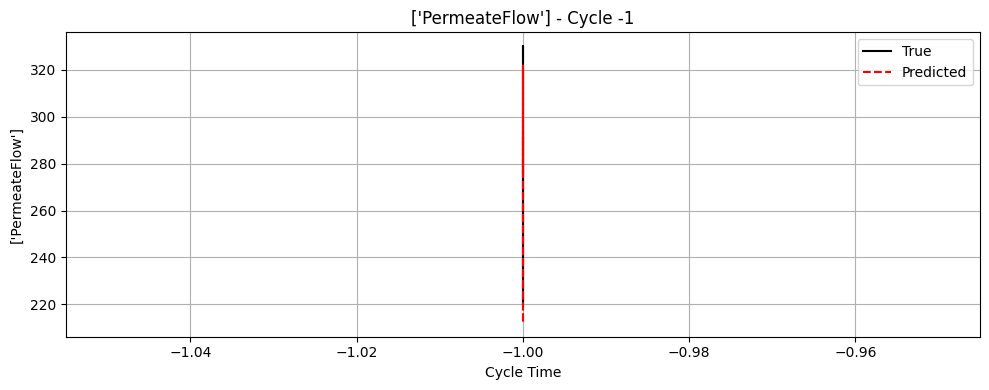

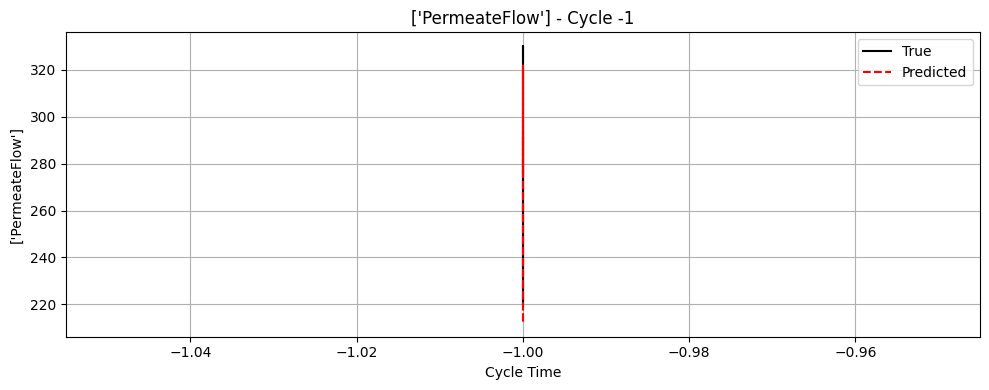

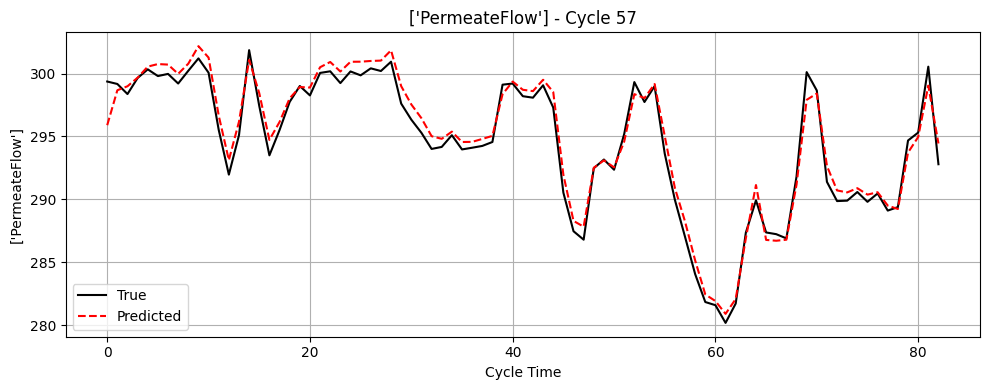

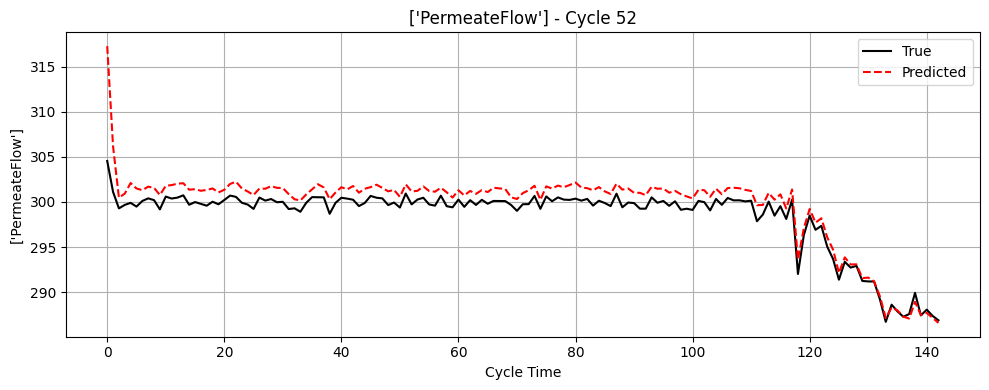



[Drop Feature Selection]

Base Loss: 0.013406
Drop PermeateFlow_lag_1: loss delta = 0.767894
Drop FeedFlow: loss delta = 17.310215
Drop Recovery: loss delta = 8.257894
Drop FeedConductivity_x_FeedFlow: loss delta = 0.118303
Drop PermeateFlow_lag_2: loss delta = -0.226730
Drop ConcentrateFlow_x_FeedFlow: loss delta = 0.511714
Drop FeedFlow_x_FeedTemperature: loss delta = -0.037667
Drop Recovery_lag_1: loss delta = -0.294181
Drop PermeateFlow_lag_3: loss delta = -0.197066
Drop FeedPressure: loss delta = -0.065407

最终选定特征数: 5


In [19]:
from model.fine_feature_selection.ffs import fine_feature_selection
s_features = fine_feature_selection(dp, top_k_features, target)

In [20]:
from model.lstm_model.enhanced_lstm import lstm_model

Epoch 1/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 77.06it/s]


Epoch [1/100]  Train Loss: 0.2137  Test Loss: 0.0543


Epoch 2/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 75.87it/s]


Epoch [2/100]  Train Loss: 0.1371  Test Loss: 0.0459


Epoch 3/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 71.11it/s]


Epoch [3/100]  Train Loss: 0.0916  Test Loss: 0.0436


Epoch 4/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 70.60it/s]


Epoch [4/100]  Train Loss: 0.0990  Test Loss: 0.0410


Epoch 5/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 74.01it/s]


Epoch [5/100]  Train Loss: 0.0927  Test Loss: 0.0415


Epoch 6/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 74.91it/s]


Epoch [6/100]  Train Loss: 0.0802  Test Loss: 0.0330


Epoch 7/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:03<00:00, 66.53it/s]


Epoch [7/100]  Train Loss: 0.0566  Test Loss: 0.0201


Epoch 8/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:03<00:00, 65.23it/s]


Epoch [8/100]  Train Loss: 0.0380  Test Loss: 0.0145


Epoch 9/100: 100%|███████████████████████████████████████████████████████████████████| 202/202 [00:03<00:00, 61.87it/s]


Epoch [9/100]  Train Loss: 0.0345  Test Loss: 0.0079


Epoch 10/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 68.79it/s]


Epoch [10/100]  Train Loss: 0.0294  Test Loss: 0.0072


Epoch 11/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 70.23it/s]


Epoch [11/100]  Train Loss: 0.0250  Test Loss: 0.0057


Epoch 12/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 69.34it/s]


Epoch [12/100]  Train Loss: 0.0252  Test Loss: 0.0057


Epoch 13/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 69.45it/s]


Epoch [13/100]  Train Loss: 0.0292  Test Loss: 0.0048


Epoch 14/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 70.64it/s]


Epoch [14/100]  Train Loss: 0.0153  Test Loss: 0.0035


Epoch 15/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 69.81it/s]


Epoch [15/100]  Train Loss: 0.0093  Test Loss: 0.0026


Epoch 16/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 70.17it/s]


Epoch [16/100]  Train Loss: 0.0144  Test Loss: 0.0031


Epoch 17/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 69.68it/s]


Epoch [17/100]  Train Loss: 0.0146  Test Loss: 0.0026


Epoch 18/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 68.89it/s]


Epoch [18/100]  Train Loss: 0.0300  Test Loss: 0.0039


Epoch 19/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 69.75it/s]


Epoch [19/100]  Train Loss: 0.0152  Test Loss: 0.0027


Epoch 20/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 68.00it/s]


Epoch [20/100]  Train Loss: 0.0076  Test Loss: 0.0022


Epoch 21/100: 100%|██████████████████████████████████████████████████████████████████| 202/202 [00:02<00:00, 70.43it/s]


Epoch [21/100]  Train Loss: 0.0159  Test Loss: 0.0025
Early stopping at epoch 21
R2 Score: 0.9845, MAE: 0.0608


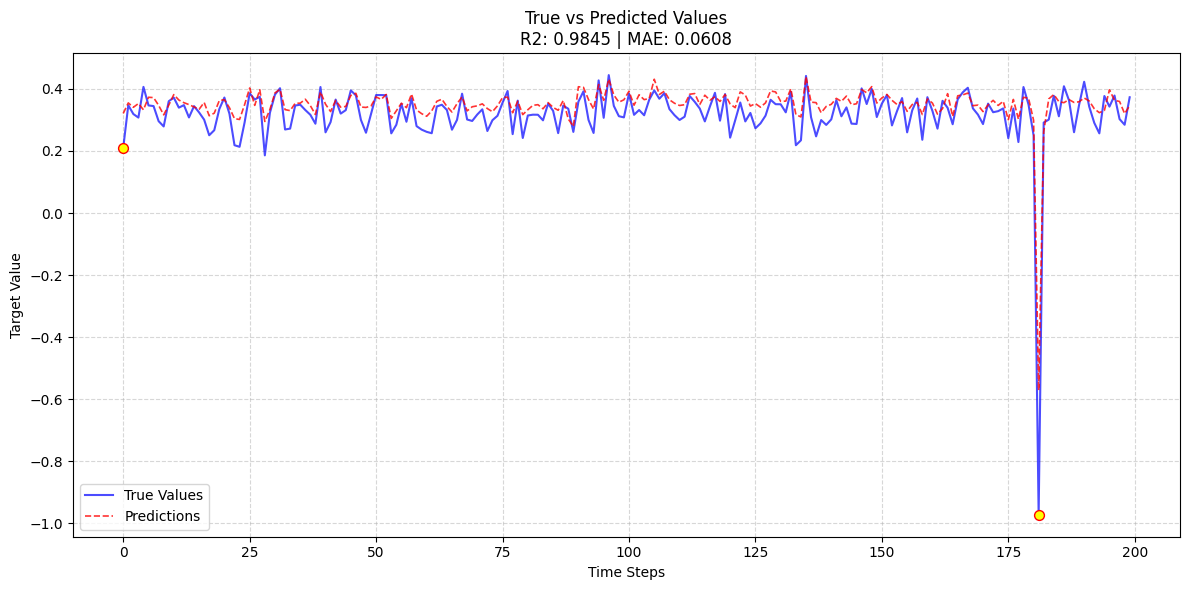

In [21]:
lstm_model(dp, top_k_features, target)